In [41]:
install.packages("viridis")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
library(tidyverse)
library(repr)
library(readxl)
library(viridis)
library(ggplot2)

ERROR: Error in library(viridis): there is no package called ‘viridis’


In [4]:
original_data <- read_excel("Blue_Chip_Credit_Dataset.xlsx")
head(original_data)

CLIENTNUM Attrition_Flag    Customer_Age Gender Dependent_count
1 768805383 Attrited Customer 45           M      3              
2 818770008 Existing Customer 49           F      5              
3 713982108 Existing Customer 51           M      3              
4 769911858 Existing Customer 40           F      4              
5 709106358 Existing Customer 40           M      3              
6 713061558 Existing Customer 44           M      2              
  Education_Level Marital_Status Income_Category Card_Category Months_on_book
1 High School     Married        $60K - $80K     Blue          39            
2 Graduate        Single         Less than $40K  Blue          44            
3 Graduate        Married        $80K - $120K    Blue          36            
4 High School     Unknown        Less than $40K  Blue          34            
5 Uneducated      Married        $60K - $80K     Blue          21            
6 Graduate        Married        $40K - $60K     Blue          36            
  Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon
1 5                        1                      3                    
2 6                        1                      2                    
3 4                        1                      0                    
4 3                        4                      1                    
5 5                        1                      0                    
6 3                        1                      2                    
  Credit_Limit
1 12691       
2  8256       
3  3418       
4  3313       
5  4716       
6  4010

In [5]:
cleaned_data <- original_data |>
filter(Education_Level != "Unknown", Marital_Status != "Unknown", Income_Category != "Unknown") |>
distinct()

head(cleaned_data)
nrow(cleaned_data)

CLIENTNUM Attrition_Flag    Customer_Age Gender Dependent_count
1 768805383 Attrited Customer 45           M      3              
2 818770008 Existing Customer 49           F      5              
3 713982108 Existing Customer 51           M      3              
4 709106358 Existing Customer 40           M      3              
5 713061558 Existing Customer 44           M      2              
6 710930508 Attrited Customer 21           M      3              
  Education_Level Marital_Status Income_Category Card_Category Months_on_book
1 High School     Married        $60K - $80K     Blue          39            
2 Graduate        Single         Less than $40K  Blue          44            
3 Graduate        Married        $80K - $120K    Blue          36            
4 Uneducated      Married        $60K - $80K     Blue          21            
5 Graduate        Married        $40K - $60K     Blue          36            
6 College         Single         Less than $40K  Blue          36            
  Total_Relationship_Count Months_Inactive_12_mon Contacts_Count_12_mon
1 5                        1                      3                    
2 6                        1                      2                    
3 4                        1                      0                    
4 5                        1                      0                    
5 3                        1                      2                    
6 5                        2                      0                    
  Credit_Limit
1 12691       
2  8256       
3  3418       
4  4716       
5  4010       
6 22352

[1] 7315

In [6]:
attrited <- cleaned_data |>
filter(Attrition_Flag=="Attrited Customer")
nrow(attrited)

[1] 1733

In [7]:
existing <- cleaned_data |>
filter(Attrition_Flag=="Existing Customer")
nrow(existing)

[1] 5582

In [8]:
overall_rate = nrow(attrited)/nrow(cleaned_data)
overall_rate

[1] 0.2369105

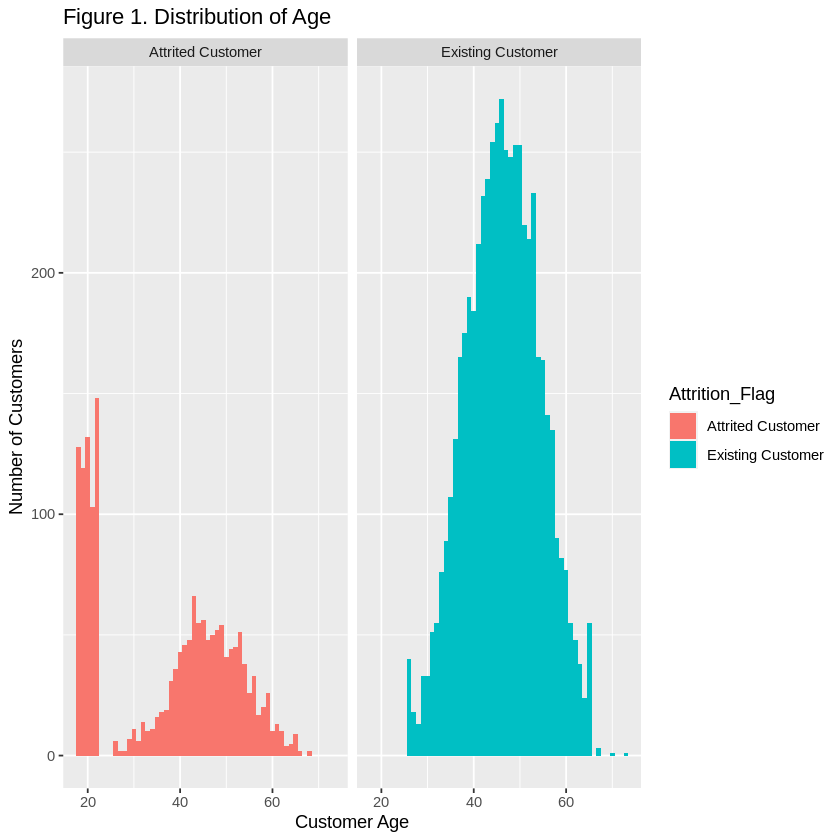

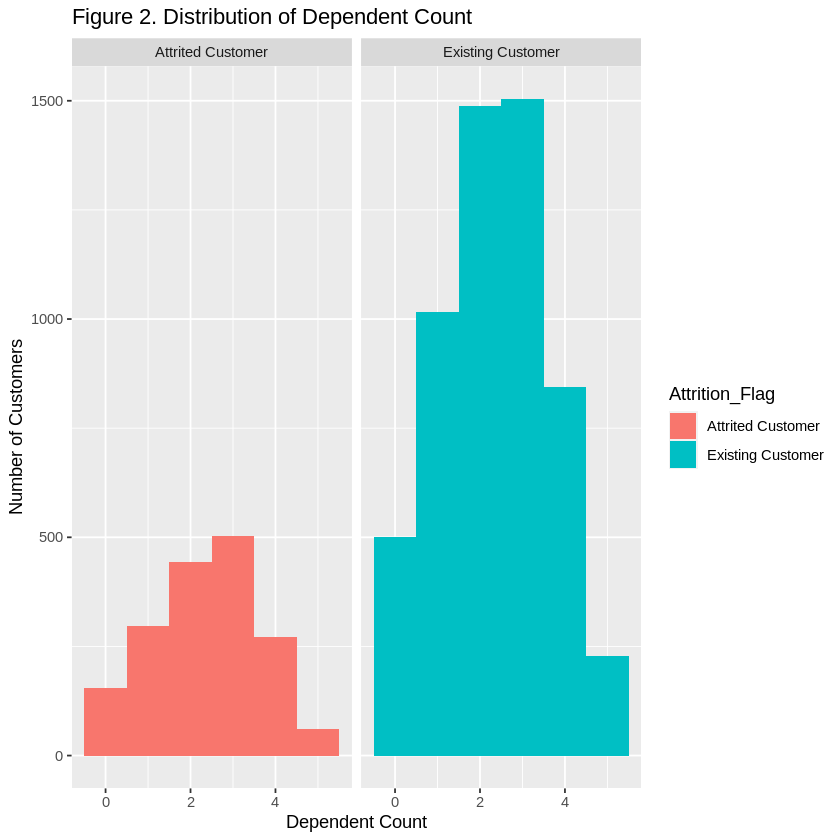

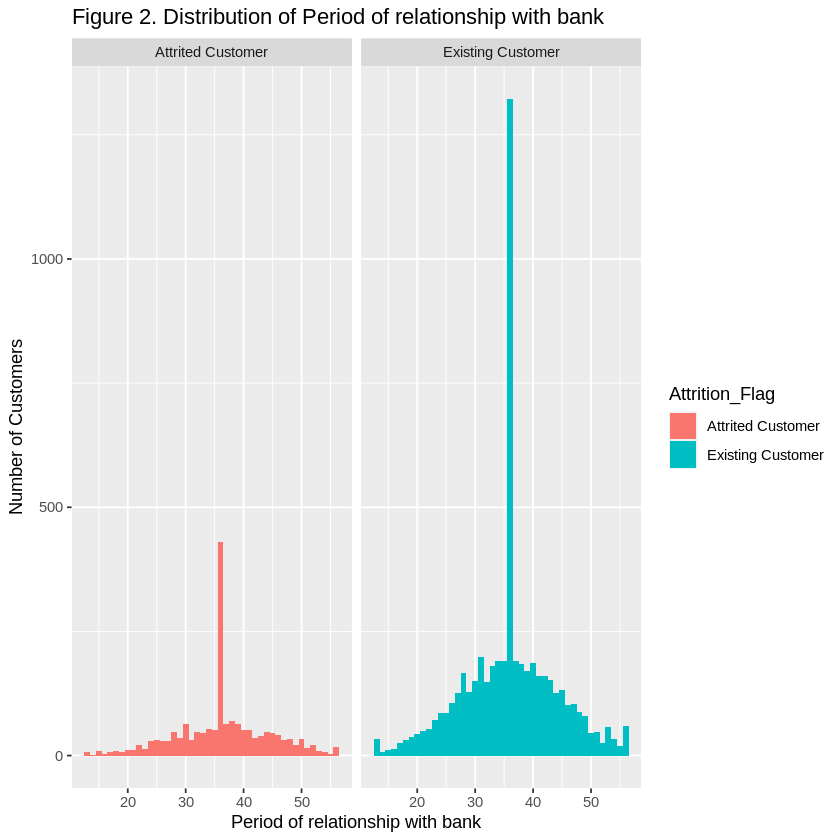

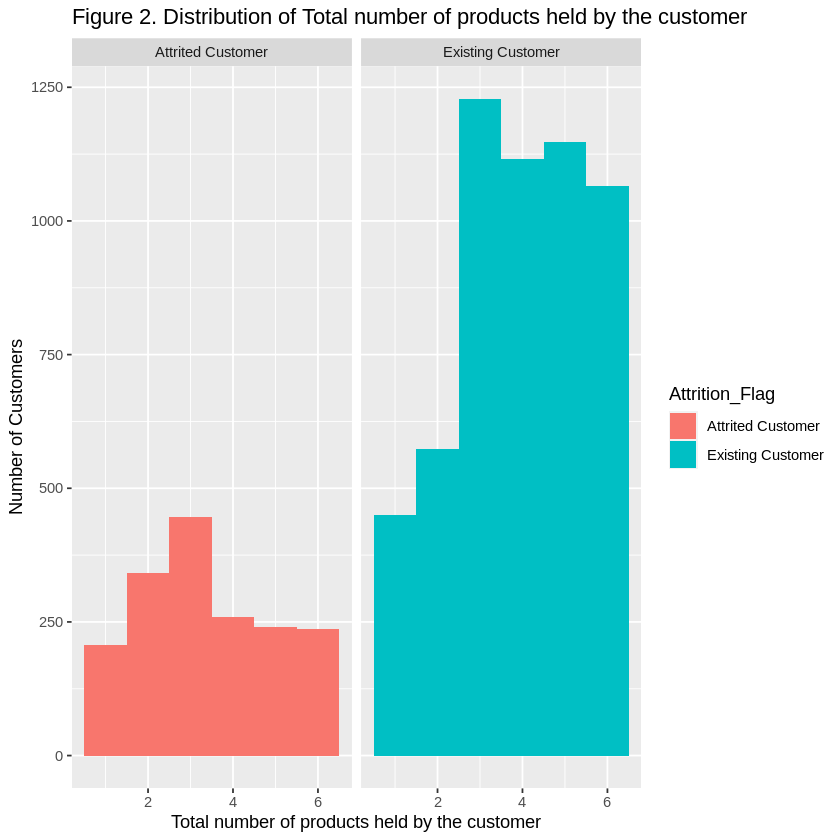

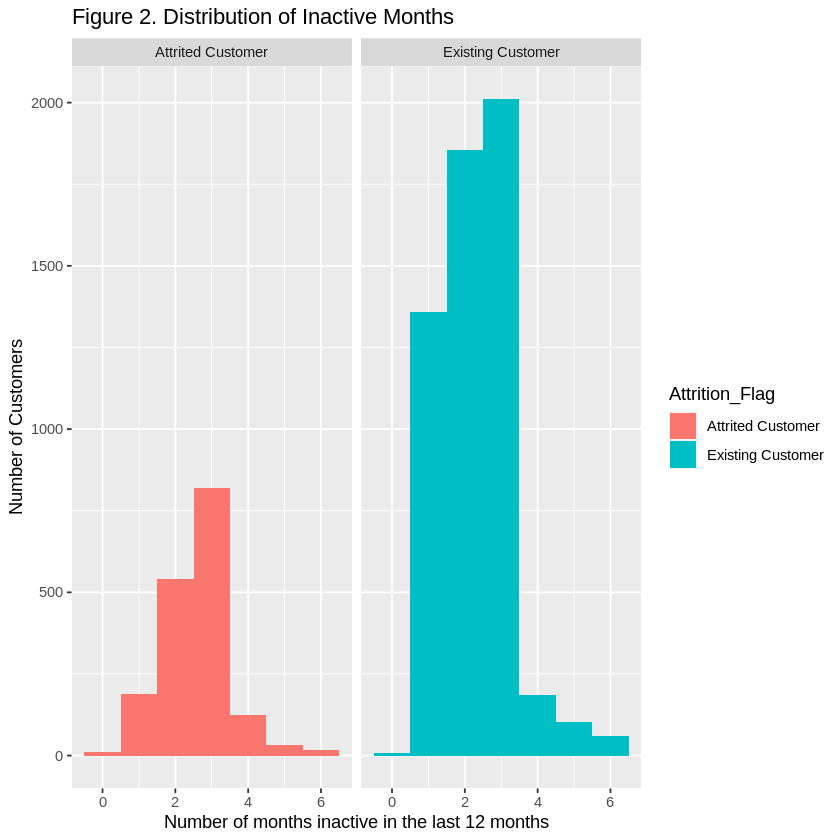

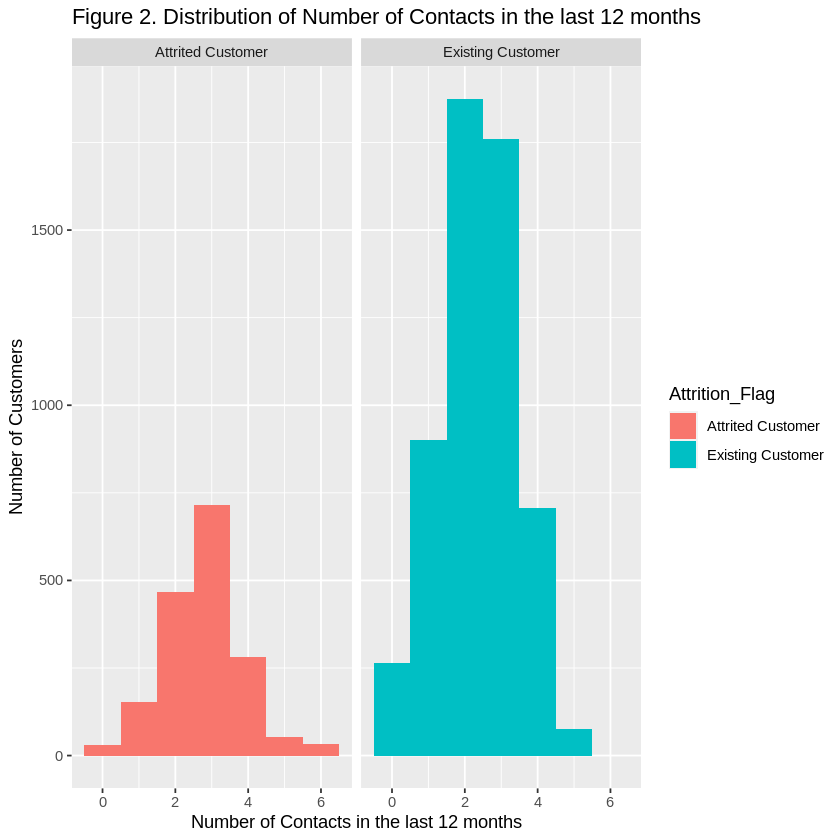

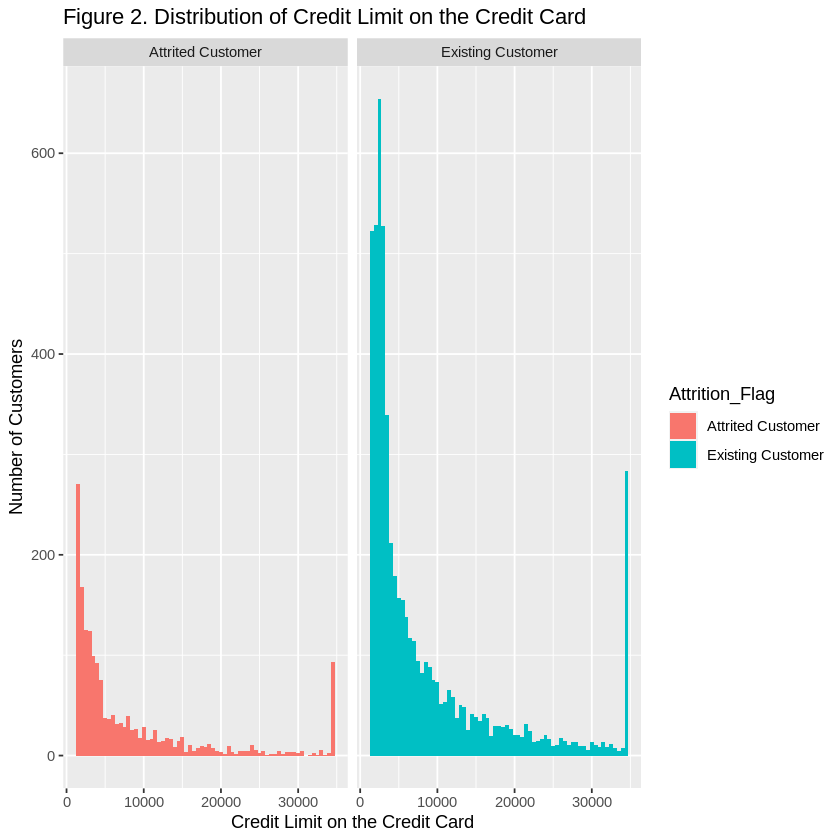

In [9]:
age <- cleaned_data |>
ggplot(aes(x= Customer_Age, fill = Attrition_Flag)) +
geom_histogram(binwidth = 1) +
facet_grid(~Attrition_Flag) +
labs(x="Customer Age",
     y="Number of Customers",
     title = "Figure 1. Distribution of Age")

dependent <- cleaned_data |>
ggplot(aes(x= Dependent_count, fill = Attrition_Flag)) +
geom_histogram(binwidth = 1) +
facet_grid(~Attrition_Flag) +
labs(x="Dependent Count",
     y="Number of Customers",
     title = "Figure 2. Distribution of Dependent Count")

months <- cleaned_data |>
ggplot(aes(x= Months_on_book, fill = Attrition_Flag)) +
geom_histogram(binwidth = 1) +
facet_grid(~Attrition_Flag) +
labs(x="Period of relationship with bank",
     y="Number of Customers",
     title = "Figure 2. Distribution of Period of relationship with bank")

relationships <- cleaned_data |>
ggplot(aes(x= Total_Relationship_Count, fill = Attrition_Flag)) +
geom_histogram(binwidth = 1) +
facet_grid(~Attrition_Flag) +
labs(x="Total number of products held by the customer",
     y="Number of Customers",
     title = "Figure 2. Distribution of Total number of products held by the customer")


inactive <- cleaned_data |>
ggplot(aes(x= Months_Inactive_12_mon, fill = Attrition_Flag)) +
geom_histogram(binwidth = 1) +
facet_grid(~Attrition_Flag) +
labs(x="Number of months inactive in the last 12 months",
     y="Number of Customers",
     title = "Figure 2. Distribution of Inactive Months")

contact <- cleaned_data |>
ggplot(aes(x= Contacts_Count_12_mon, fill = Attrition_Flag)) +
geom_histogram(binwidth = 1) +
facet_grid(~Attrition_Flag) +
labs(x="Number of Contacts in the last 12 months",
     y="Number of Customers",
     title = "Figure 2. Distribution of Number of Contacts in the last 12 months")

credit <- cleaned_data |>
ggplot(aes(x= Credit_Limit, fill = Attrition_Flag)) +
geom_histogram(binwidth = 500) +
facet_grid(~Attrition_Flag) +
labs(x="Credit Limit on the Credit Card",
     y="Number of Customers",
     title = "Figure 2. Distribution of Credit Limit on the Credit Card")


age
dependent
months
relationships
inactive
contact
credit

In [85]:
# modified_dataframe <- cleaned_data |>
# select(Income_Category, Marital_Status,Education_Level, Gender, Card_Category,Attrition_Flag) |>
# pivot_longer(cols=Income_Category:Card_Category, 
#              names_to = "Category",
#              values_to = "Status")


# head(modified_dataframe)

In [86]:
# circular_barplot <- modified_dataframe |>
# ggplot(aes(x= Status,
#            y= Attrition_Flag,
#           fill = Attrition_Flag)) +
# geom_bar(stat="identity") +
# coord_polar(start = 0)

# circular_barplot

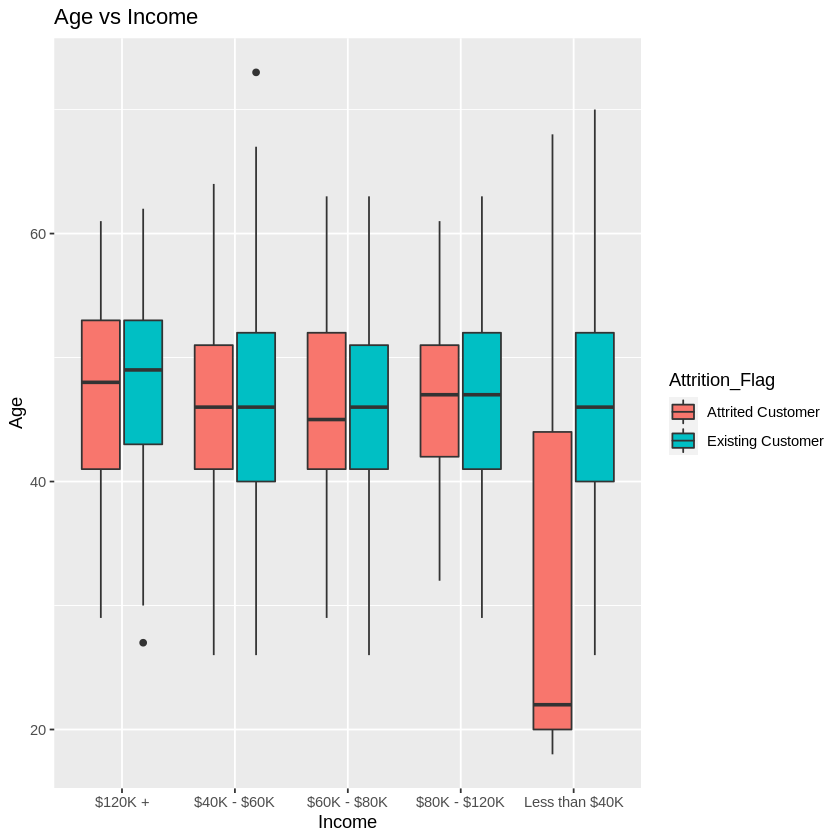

In [10]:
income_age <- cleaned_data |>
ggplot(aes(x=Income_Category, y=Customer_Age, fill=Attrition_Flag)) +
geom_boxplot() +
labs(x="Income", y="Age", title="Age vs Income")
income_age

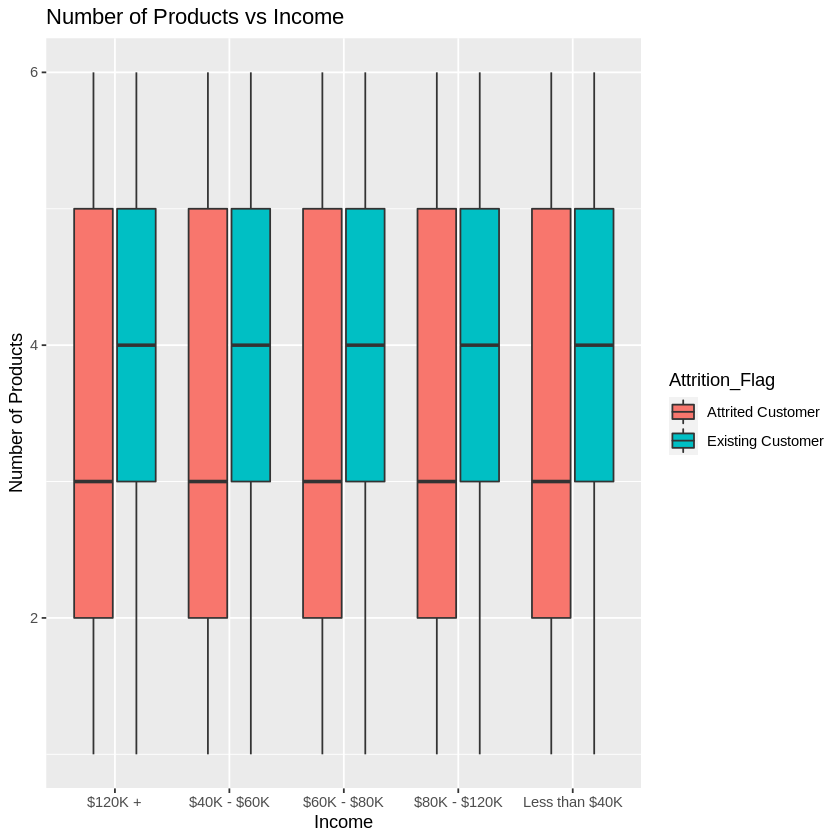

In [11]:
income_dependent <- cleaned_data |>
ggplot(aes(x=Income_Category, y=Total_Relationship_Count, fill=Attrition_Flag)) +
geom_boxplot() +
labs(x="Income", y="Number of Products", title="Number of Products vs Income")
income_dependent

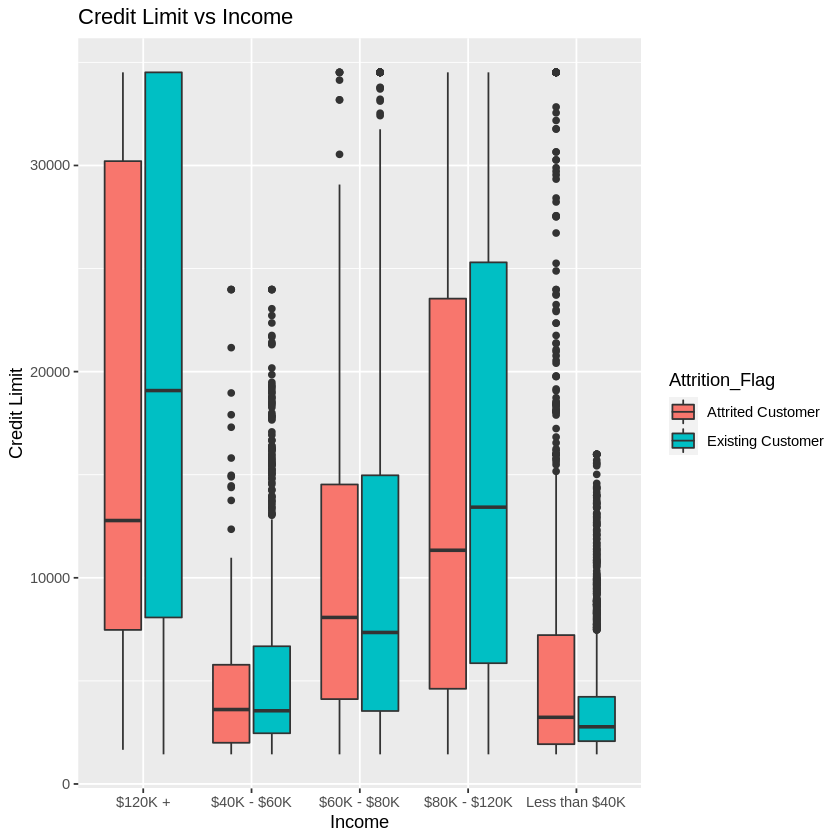

In [12]:
income_credit <- cleaned_data |>
ggplot(aes(x=Income_Category, y=Credit_Limit, fill=Attrition_Flag)) +
geom_boxplot() +
labs(x="Income", y="Credit Limit", title="Credit Limit vs Income")
income_credit

In [16]:
attrited_twenty <- cleaned_data |>
filter(Customer_Age > 15, Customer_Age < 25, Attrition_Flag == "Attrited Customer")
attrited_twenty

CLIENTNUM Attrition_Flag    Customer_Age Gender Dependent_count
1   710930508 Attrited Customer 21           M      3              
2   719661558 Attrited Customer 19           M      2              
3   708508758 Attrited Customer 20           F      0              
4   778493808 Attrited Customer 18           M      3              
5   720572508 Attrited Customer 22           F      4              
6   789172683 Attrited Customer 19           M      2              
7   712813458 Attrited Customer 22           M      2              
8   714374133 Attrited Customer 19           M      2              
9   711013983 Attrited Customer 19           F      4              
10  719712633 Attrited Customer 21           M      1              
11  708296883 Attrited Customer 22           F      3              
12  712950783 Attrited Customer 18           F      4              
13  818839983 Attrited Customer 18           M      2              
14  711551958 Attrited Customer 20           M      2              
15  720997383 Attrited Customer 21           M      1              
16  718621608 Attrited Customer 20           F      2              
17  708288108 Attrited Customer 21           M      4              
18  717354558 Attrited Customer 22           M      2              
19  714639783 Attrited Customer 18           M      3              
20  712159083 Attrited Customer 18           F      4              
21  712315683 Attrited Customer 20           F      2              
22  719443683 Attrited Customer 22           M      1              
23  713865333 Attrited Customer 20           F      4              
24  718675158 Attrited Customer 21           F      1              
25  802276683 Attrited Customer 18           M      3              
26  808897683 Attrited Customer 22           M      1              
27  712979133 Attrited Customer 18           M      4              
28  789513858 Attrited Customer 22           M      3              
29  771963708 Attrited Customer 20           M      3              
30  716918508 Attrited Customer 18           M      1              
⋮   ⋮         ⋮                 ⋮            ⋮      ⋮              
601 714639783 Attrited Customer 18           M      3              
602 712159083 Attrited Customer 18           F      4              
603 712315683 Attrited Customer 20           F      2              
604 719443683 Attrited Customer 22           M      1              
605 708579633 Attrited Customer 20           M      4              
606 713865333 Attrited Customer 20           F      4              
607 718675158 Attrited Customer 21           F      1              
608 802276683 Attrited Customer 18           M      3              
609 808897683 Attrited Customer 22           M      1              
610 712979133 Attrited Customer 18           M      4              
611 789513858 Attrited Customer 22           M      3              
612 771963708 Attrited Customer 20           M      3              
613 716918508 Attrited Customer 18           M      1              
614 713530833 Attrited Customer 22           M      2              
615 787456608 Attrited Customer 22           M      2              
616 710831133 Attrited Customer 20           M      3              
617 716909283 Attrited Customer 18           M      1              
618 711147483 Attrited Customer 22           F      3              
619 720990183 Attrited Customer 20           M      5              
620 788673708 Attrited Customer 18           F      2              
621 816513108 Attrited Customer 20           M      4              
622 716462658 Attrited Customer 19           M      4              
623 816600933 Attrited Customer 22           M      0              
624 714208533 Attrited Customer 19           M      3              
625 716024808 Attrited Customer 18           M      1              
626 709058808 Attrited Customer 22           F      2              
627 713845083 Attrited Customer 21           F      4       

In [18]:
nrow(attrited_twenty)

[1] 630

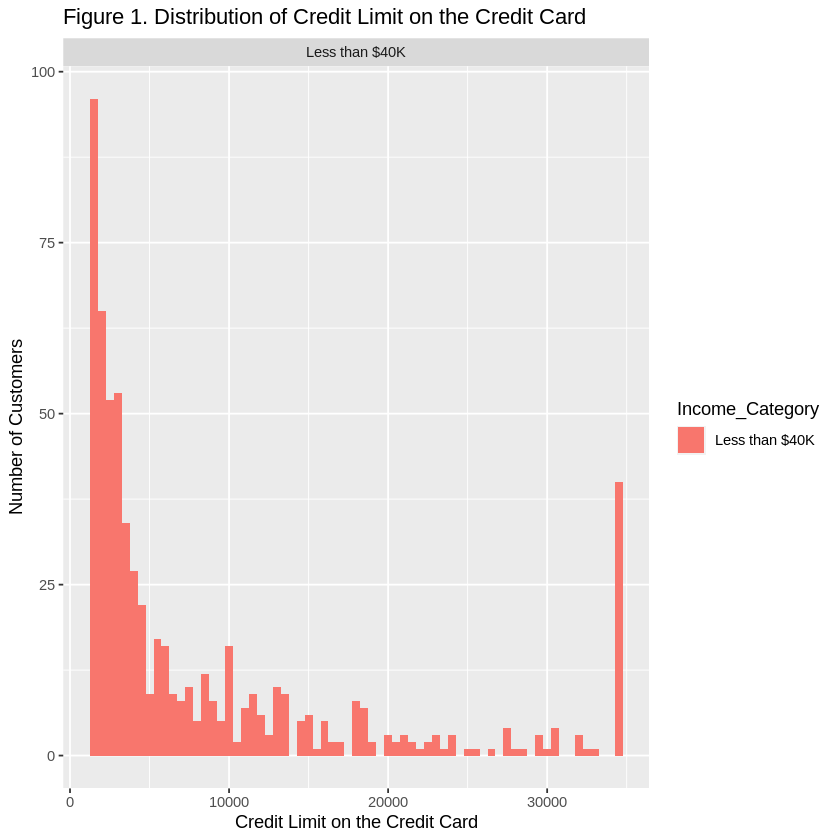

In [56]:
credit_income <- attrited_twenty |>
ggplot(aes(x= Credit_Limit, fill = Income_Category)) +
geom_histogram(binwidth = 500) +
facet_grid(~Income_Category) +
labs(x="Credit Limit on the Credit Card",
     y="Number of Customers",
     title = "Figure 1. Distribution of Credit Limit on the Credit Card")

credit_income

In [34]:
existing_twenty <- cleaned_data |>
filter(Customer_Age > 15, Customer_Age < 25, Attrition_Flag == "Existing Customer")
existing_twenty

CLIENTNUM Attrition_Flag Customer_Age Gender Dependent_count
     Education_Level Marital_Status Income_Category Card_Category
     Months_on_book Total_Relationship_Count Months_Inactive_12_mon
     Contacts_Count_12_mon Credit_Limit

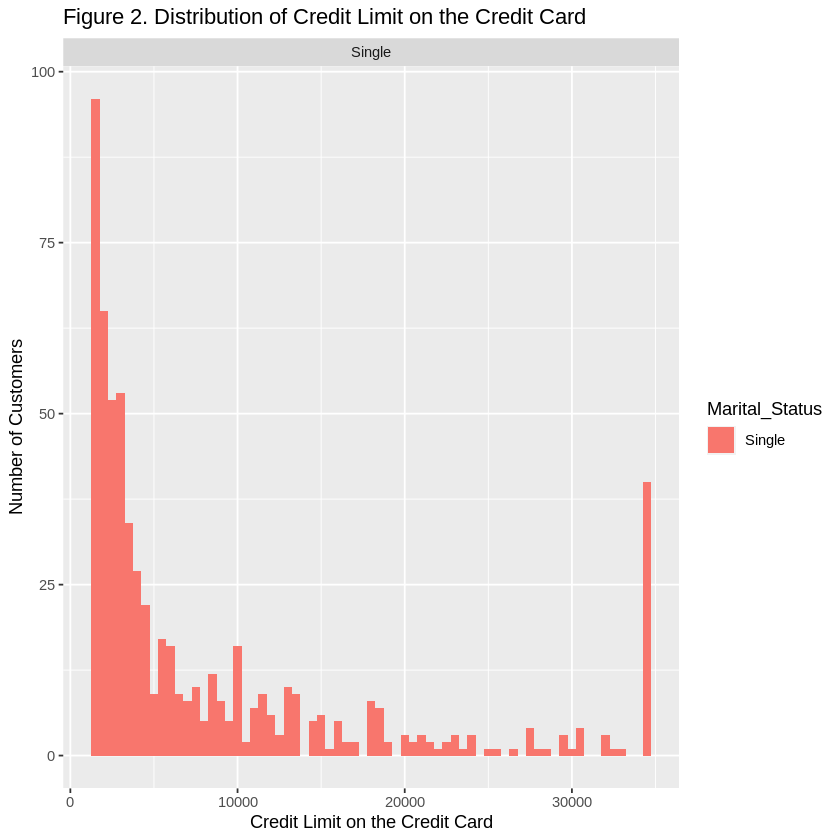

In [36]:
credit_marital <- attrited_twenty |>
ggplot(aes(x= Credit_Limit, fill = Marital_Status)) +
geom_histogram(binwidth = 500) +
facet_grid(~Marital_Status) +
labs(x="Credit Limit on the Credit Card",
     y="Number of Customers",
     title = "Figure 2. Distribution of Credit Limit on the Credit Card")
credit_marital

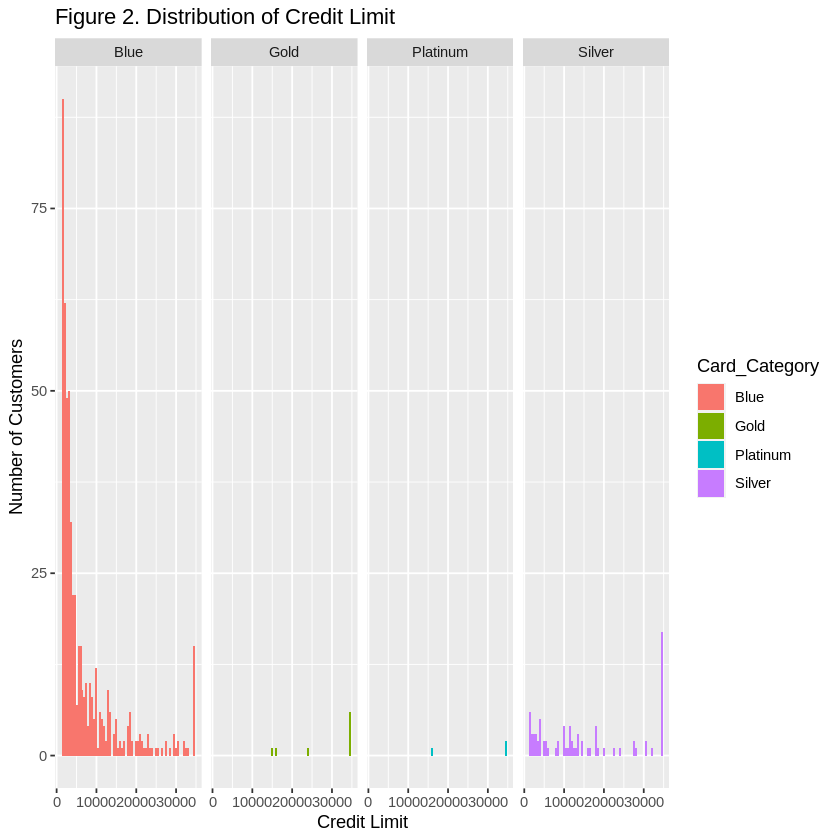

In [79]:
credit_card <- attrited_twenty |>
ggplot(aes(x= Credit_Limit, fill = Card_Category)) +
geom_histogram(binwidth = 500) +
facet_grid(~Card_Category) +
labs(x="Credit Limit",
     y="Number of Customers",
     title = "Figure 2. Distribution of Credit Limit")
credit_card

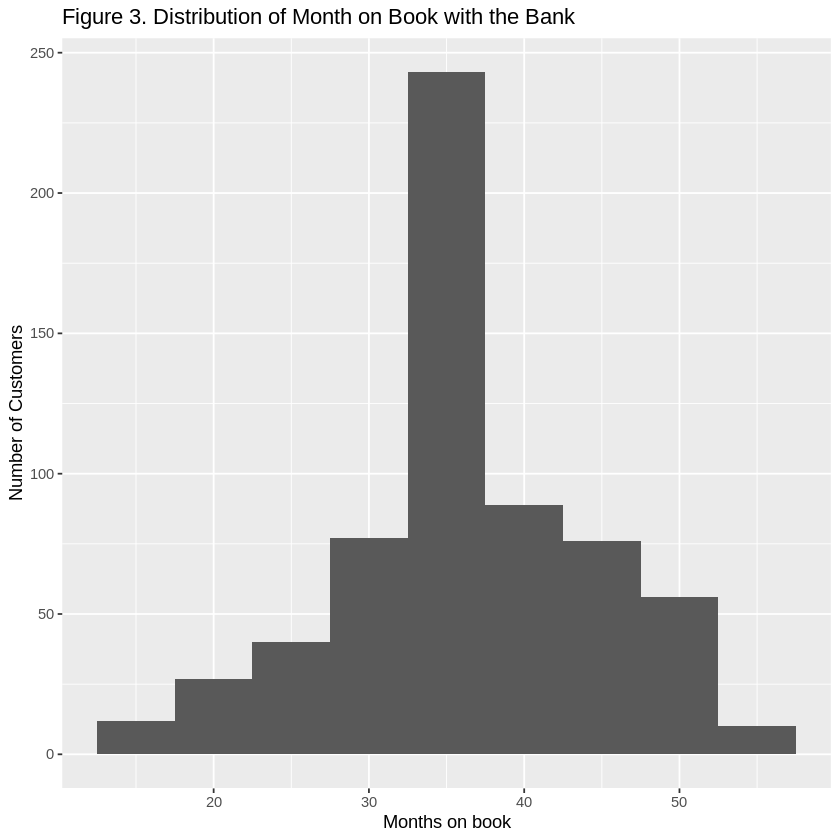

In [43]:
months <- attrited_twenty |>
ggplot(aes(x= Months_on_book)) +
geom_histogram(binwidth = 5) +
labs(x="Months on book",
     y="Number of Customers",
     title = "Figure 3. Distribution of Month on Book with the Bank")
months

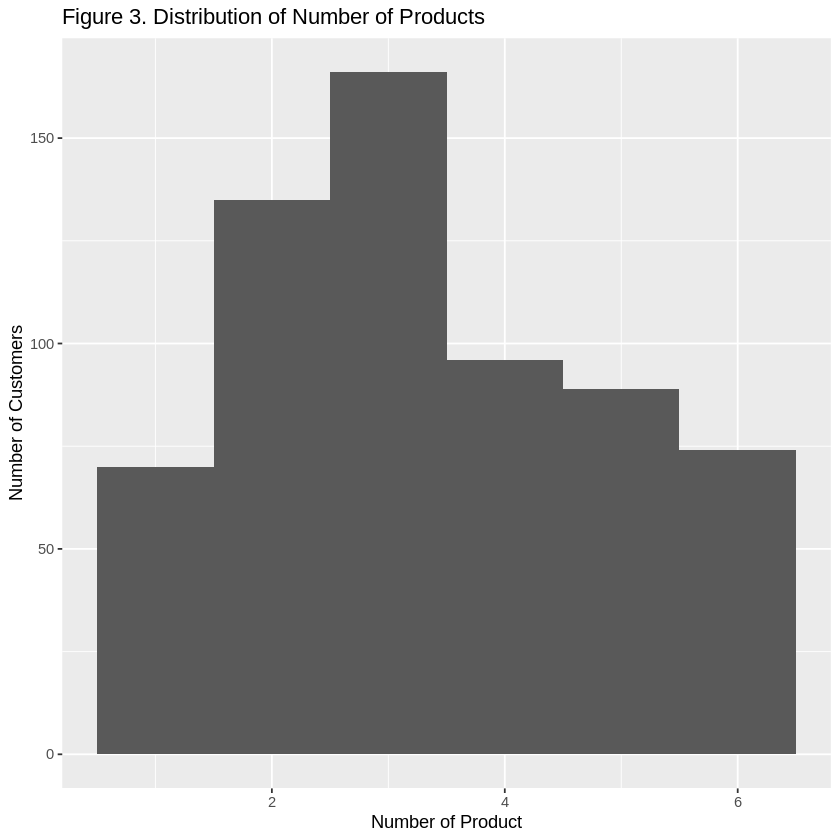

In [45]:
products <- attrited_twenty |>
ggplot(aes(x= Total_Relationship_Count)) +
geom_histogram(binwidth = 1) +
labs(x="Number of Product",
     y="Number of Customers",
     title = "Figure 3. Distribution of Number of Products")
products

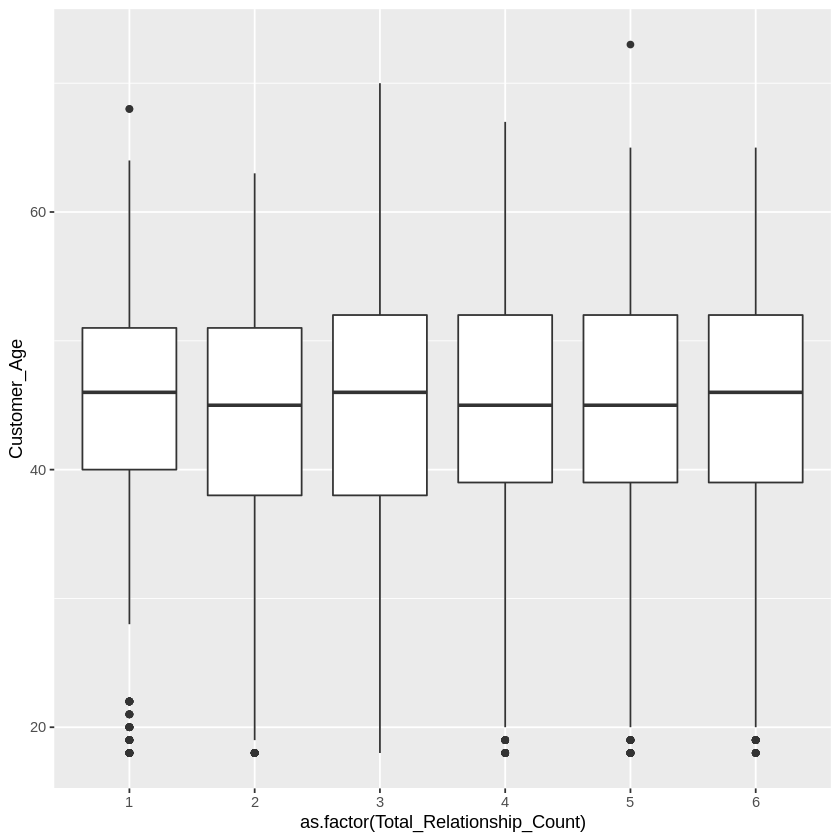

In [50]:
age_product <- cleaned_data |>
ggplot(aes(x=as.factor(Total_Relationship_Count), y=Customer_Age)) +
geom_boxplot()

age_product
#

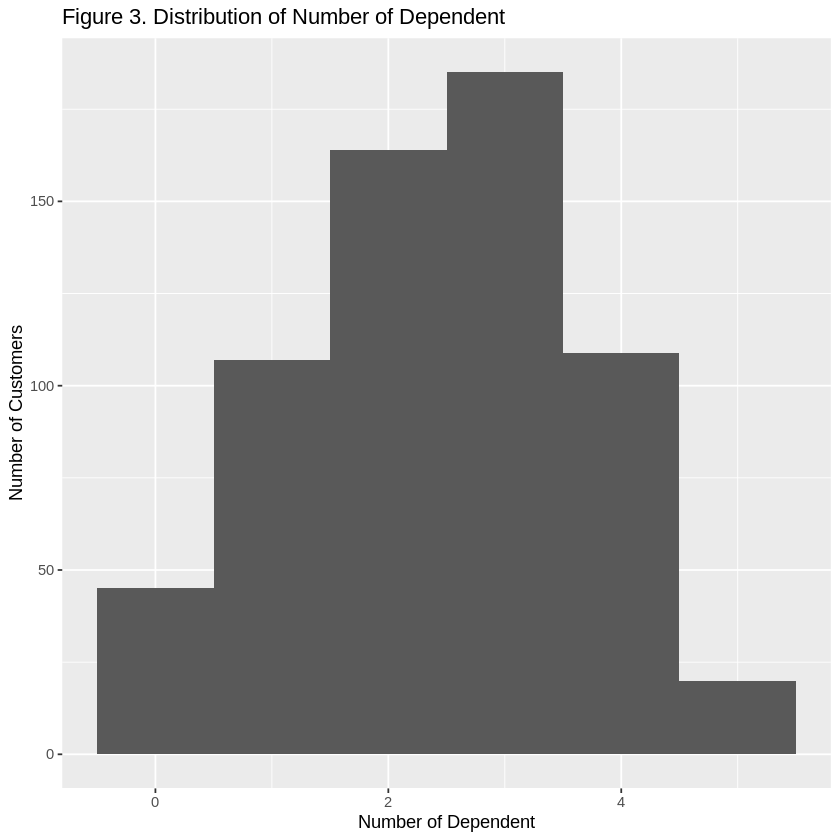

In [55]:
dependent <- attrited_twenty |>
ggplot(aes(x= Dependent_count)) +
geom_histogram(binwidth = 1) +
labs(x="Number of Dependent",
     y="Number of Customers",
     title = "Figure 3. Distribution of Number of Dependent")
dependent

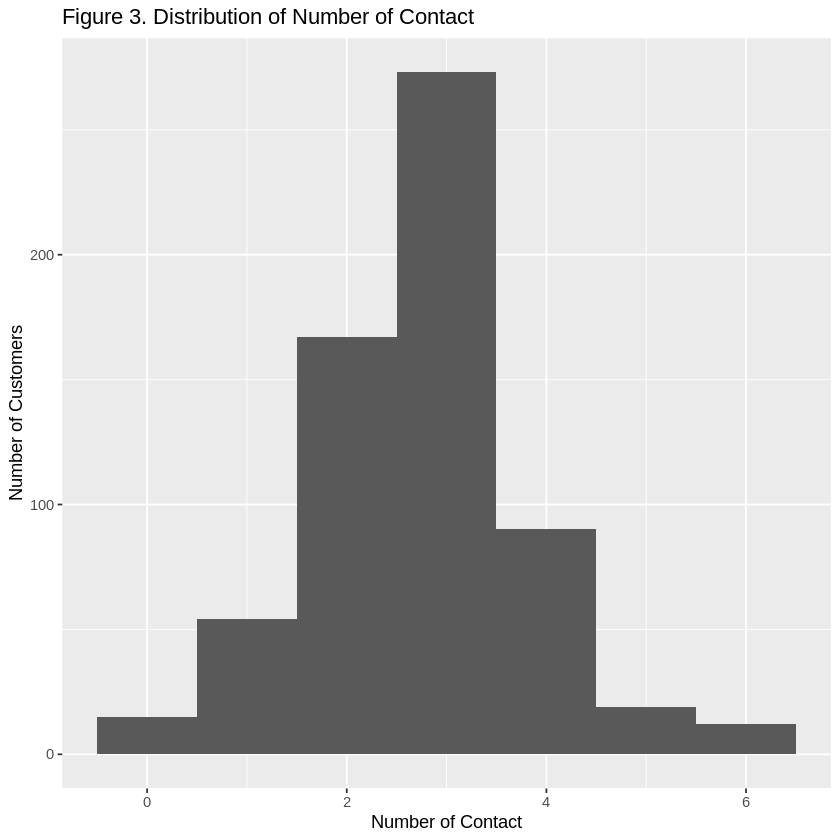

In [59]:
contact <- attrited_twenty |>
ggplot(aes(x= Contacts_Count_12_mon)) +
geom_histogram(binwidth = 1) +
labs(x="Number of Contact",
     y="Number of Customers",
     title = "Figure 3. Distribution of Number of Contact")
contact

In [73]:
income_numerical <- cleaned_data |>
mutate(income_numerical = case_when(Income_Category == 'Less than $40K' ~ 40, 
                                    Income_Category == '$40K - $60K' ~ 60,
                                   Income_Category == '$60K - $80K' ~ 80,
                                   Income_Category == '$80K - $120K' ~ 100
                                   ),
      credit_income_ratio = trunc(Credit_Limit/income_numerical))
income_numerical

CLIENTNUM Attrition_Flag    Customer_Age Gender Dependent_count
1    768805383 Attrited Customer 45           M      3              
2    818770008 Existing Customer 49           F      5              
3    713982108 Existing Customer 51           M      3              
4    709106358 Existing Customer 40           M      3              
5    713061558 Existing Customer 44           M      2              
6    710930508 Attrited Customer 21           M      3              
7    719661558 Attrited Customer 19           M      2              
8    710599683 Existing Customer 56           M      1              
9    712396908 Existing Customer 57           F      2              
10   709967358 Existing Customer 48           M      4              
11   806160108 Existing Customer 61           M      1              
12   806165208 Existing Customer 47           M      1              
13   708508758 Attrited Customer 20           F      0              
14   784725333 Existing Customer 41           M      3              
15   771071958 Existing Customer 41           F      3              
16   806624208 Existing Customer 47           M      4              
17   712991808 Existing Customer 53           M      2              
18   709029408 Existing Customer 41           M      4              
19   788658483 Existing Customer 53           F      2              
20   787937058 Existing Customer 58           M      0              
21   715318008 Existing Customer 55           F      1              
22   713962233 Existing Customer 55           F      3              
23   827111283 Existing Customer 45           M      3              
24   778493808 Attrited Customer 18           M      3              
25   720572508 Attrited Customer 22           F      4              
26   712661433 Attrited Customer 49           M      4              
27   789172683 Attrited Customer 19           M      2              
28   738406533 Attrited Customer 59           M      1              
29   799723908 Attrited Customer 46           M      3              
30   771490833 Attrited Customer 52           M      1              
⋮    ⋮         ⋮                 ⋮            ⋮      ⋮              
7286 712373208 Attrited Customer 43           M      3              
7287 716909283 Attrited Customer 18           M      1              
7288 807964908 Attrited Customer 41           M      4              
7289 711748983 Attrited Customer 30           M      1              
7290 708455883 Attrited Customer 57           M      1              
7291 763895958 Attrited Customer 53           M      2              
7292 711927108 Attrited Customer 54           M      3              
7293 711147483 Attrited Customer 22           F      3              
7294 720990183 Attrited Customer 20           M      5              
7295 716608608 Attrited Customer 41           M      2              
7296 788673708 Attrited Customer 18           F      2              
7297 816513108 Attrited Customer 20           M      4              
7298 716462658 Attrited Customer 19           M      4              
7299 816600933 Attrited Customer 22           M      0              
7300 714208533 Attrited Customer 19           M      3              
7301 720426708 Attrited Customer 56           M      3              
7302 708983658 Attrited Customer 51           M      2              
7303 778663458 Attrited Customer 65           M      1              
7304 716024808 Attrited Customer 18           M      1              
7305 721249158 Attrited Customer 42           M      2              
7306 709058808 Attrited Customer 22           F      2              
7307 761544333 Attrited Customer 37           F      4              
7308 713845083 Attrited Customer 21           F      4              
7309 712240083 Attrited Customer 19           F      3              
7310 772532208 Attrited Customer 51           F      2              
7311 778929783 Attrited Customer 40           M      3              
731

In [76]:
income_numerical_attrited_twenty <- attrited_twenty |>
mutate(income_numerical = case_when(Income_Category == 'Less than $40K' ~ 40),
      credit_income_ratio = trunc(Credit_Limit/income_numerical))
income_numerical_attrited_twenty

CLIENTNUM Attrition_Flag    Customer_Age Gender Dependent_count
1   710930508 Attrited Customer 21           M      3              
2   719661558 Attrited Customer 19           M      2              
3   708508758 Attrited Customer 20           F      0              
4   778493808 Attrited Customer 18           M      3              
5   720572508 Attrited Customer 22           F      4              
6   789172683 Attrited Customer 19           M      2              
7   712813458 Attrited Customer 22           M      2              
8   714374133 Attrited Customer 19           M      2              
9   711013983 Attrited Customer 19           F      4              
10  719712633 Attrited Customer 21           M      1              
11  708296883 Attrited Customer 22           F      3              
12  712950783 Attrited Customer 18           F      4              
13  818839983 Attrited Customer 18           M      2              
14  711551958 Attrited Customer 20           M      2              
15  720997383 Attrited Customer 21           M      1              
16  718621608 Attrited Customer 20           F      2              
17  708288108 Attrited Customer 21           M      4              
18  717354558 Attrited Customer 22           M      2              
19  714639783 Attrited Customer 18           M      3              
20  712159083 Attrited Customer 18           F      4              
21  712315683 Attrited Customer 20           F      2              
22  719443683 Attrited Customer 22           M      1              
23  713865333 Attrited Customer 20           F      4              
24  718675158 Attrited Customer 21           F      1              
25  802276683 Attrited Customer 18           M      3              
26  808897683 Attrited Customer 22           M      1              
27  712979133 Attrited Customer 18           M      4              
28  789513858 Attrited Customer 22           M      3              
29  771963708 Attrited Customer 20           M      3              
30  716918508 Attrited Customer 18           M      1              
⋮   ⋮         ⋮                 ⋮            ⋮      ⋮              
601 714639783 Attrited Customer 18           M      3              
602 712159083 Attrited Customer 18           F      4              
603 712315683 Attrited Customer 20           F      2              
604 719443683 Attrited Customer 22           M      1              
605 708579633 Attrited Customer 20           M      4              
606 713865333 Attrited Customer 20           F      4              
607 718675158 Attrited Customer 21           F      1              
608 802276683 Attrited Customer 18           M      3              
609 808897683 Attrited Customer 22           M      1              
610 712979133 Attrited Customer 18           M      4              
611 789513858 Attrited Customer 22           M      3              
612 771963708 Attrited Customer 20           M      3              
613 716918508 Attrited Customer 18           M      1              
614 713530833 Attrited Customer 22           M      2              
615 787456608 Attrited Customer 22           M      2              
616 710831133 Attrited Customer 20           M      3              
617 716909283 Attrited Customer 18           M      1              
618 711147483 Attrited Customer 22           F      3              
619 720990183 Attrited Customer 20           M      5              
620 788673708 Attrited Customer 18           F      2              
621 816513108 Attrited Customer 20           M      4              
622 716462658 Attrited Customer 19           M      4              
623 816600933 Attrited Customer 22           M      0              
624 714208533 Attrited Customer 19           M      3              
625 716024808 Attrited Customer 18           M      1              
626 709058808 Attrited Customer 22           F      2              
627 713845083 Attrited Customer 21           F      4       

Warning message:
“Removed 532 rows containing non-finite values (stat_bin).”


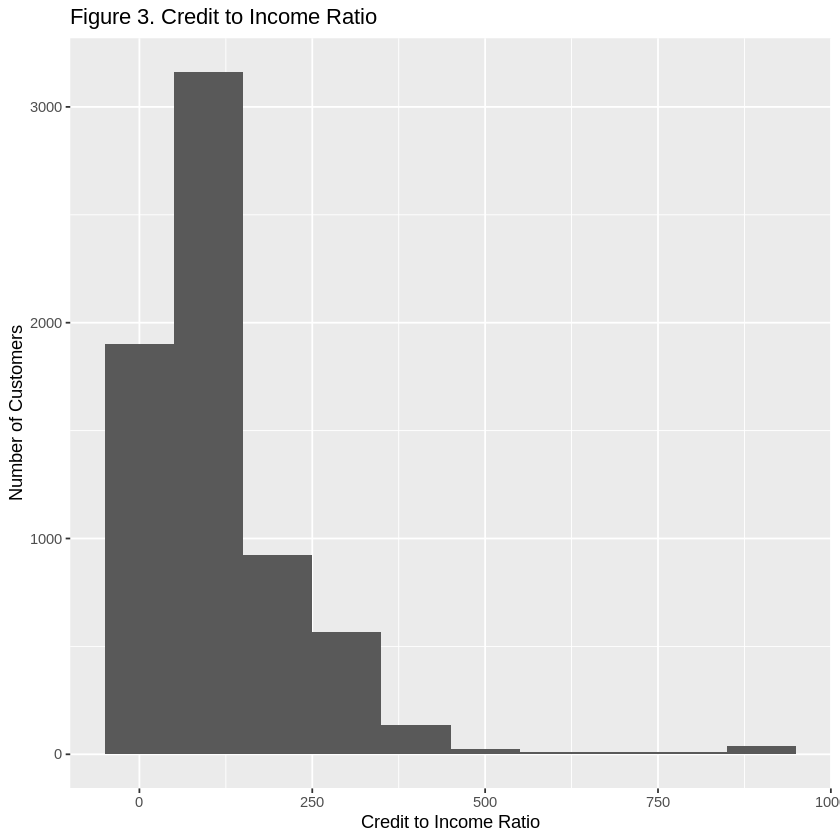

In [77]:
credit_income_pop <- income_numerical |>
ggplot(aes(x= credit_income_ratio)) +
geom_histogram(binwidth = 100) +
labs(x="Credit to Income Ratio",
     y="Number of Customers",
     title = "Figure 3. Credit to Income Ratio")
credit_income_pop

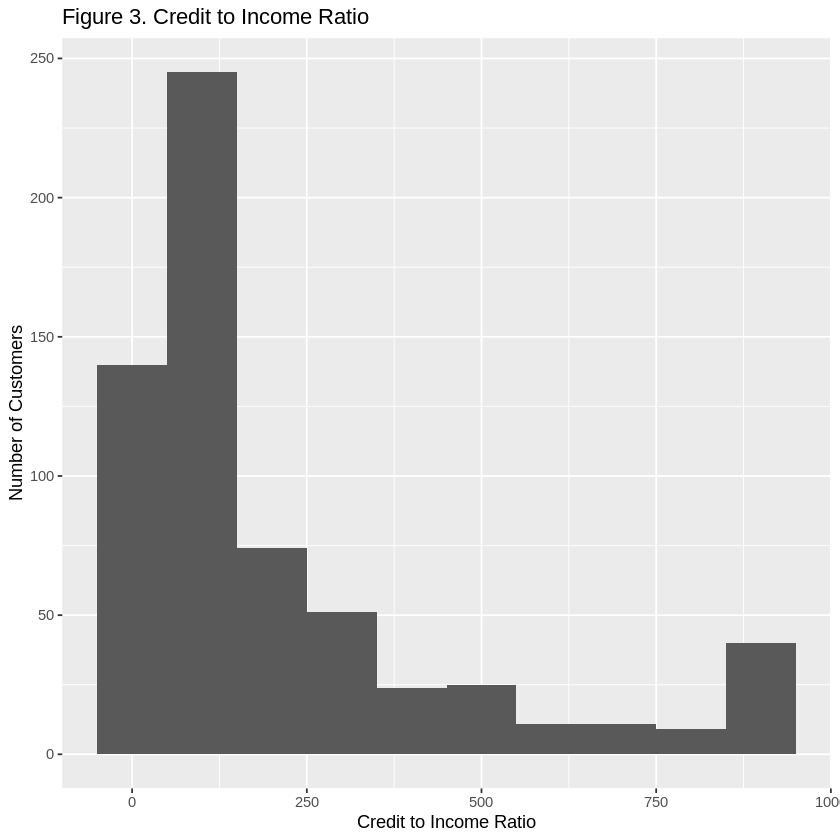

In [78]:
credit_income_target <- income_numerical_attrited_twenty |>
ggplot(aes(x= credit_income_ratio)) +
geom_histogram(binwidth = 100) +
labs(x="Credit to Income Ratio",
     y="Number of Customers",
     title = "Figure 3. Credit to Income Ratio")
credit_income_target 